# Laboratorio 7
## PROCESAMIENTO DIGITAL DE SEÑALES.

* Julián Mauricio Sánchez Ceballos
* cc: 1001132830

Departamento de Ingeniería Electrónica y Telecomunicaciones.    

In [1]:
%pip install numpy -q
%pip install matplotlib -q
%pip install scipy -q
%pip install pandas -q


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import warnings 
warnings.simplefilter("ignore")



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1. Transformada Rápida de Fourier para señales discretas

In [2]:
def dftmatrix(N, Nfft):
    #construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)


1. Genere la siguiente señal de acuerdo con el último número de su cédula (C).  
 
 $$   \sin(2\pi \cdot (C + 5) \cdot 10 \cdot t) $$
    
 La frecuencia de muestreo debe ser al menos 20 veces mayor que la frecuencia de su señal.

2. Calcule la matriz de transformación \( U \) y grafique la transformada de Fourier de la señal asignada para al menos 3 distintos valores de \( NFFT \) (grafique los resultados usando subplots).  
    ¿Qué se puede concluir al respecto?

    **Ejemplo:**  
    Una señal sinusoidal con una frecuencia de 50 Hz, \( f_s = 400 \, Hz \), y \( NFFT = 512 \).


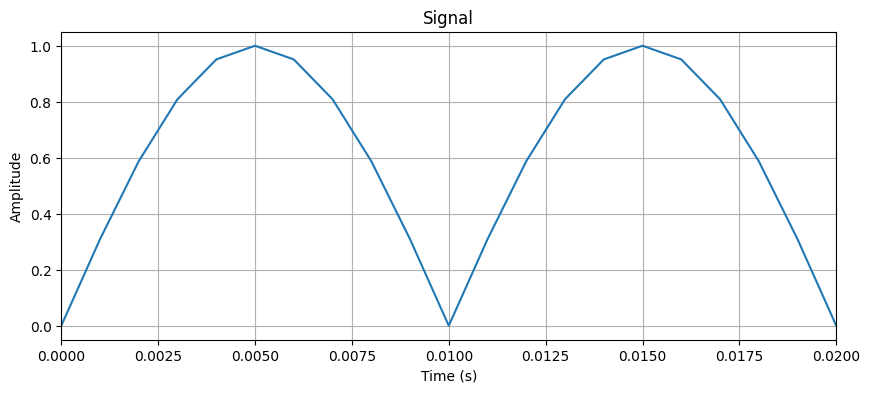

In [27]:
C = 0
f = (C + 5)*10
fs = 20*f
t = np.arange(0, 10/f, 1/fs)
x = np.abs(np.sin(2*np.pi*f*t))

plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 1/f)
plt.grid()
plt.show()



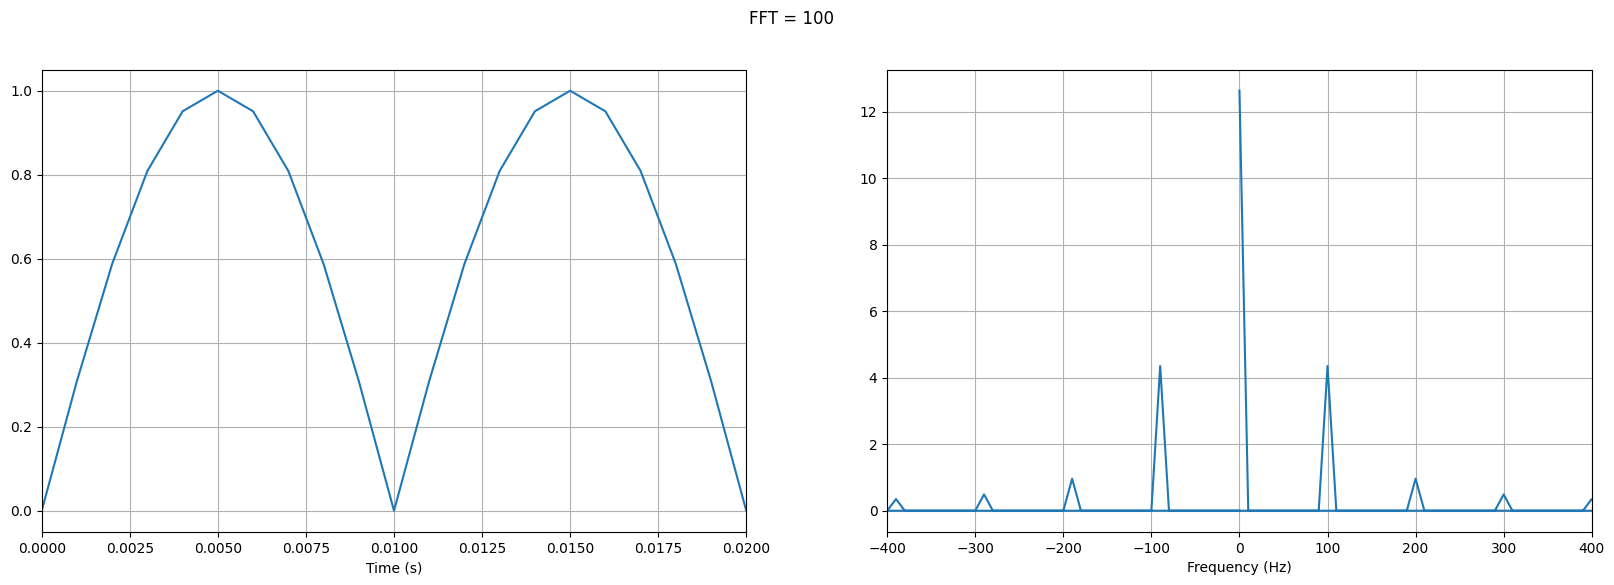

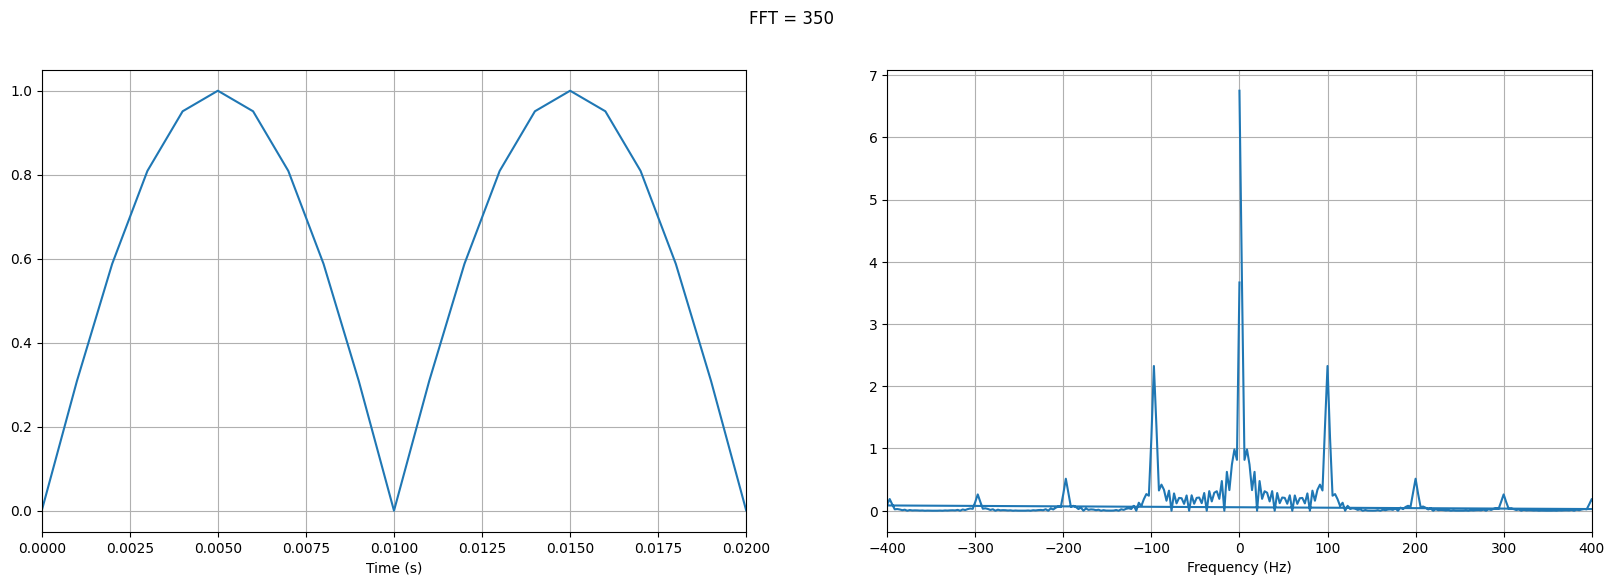

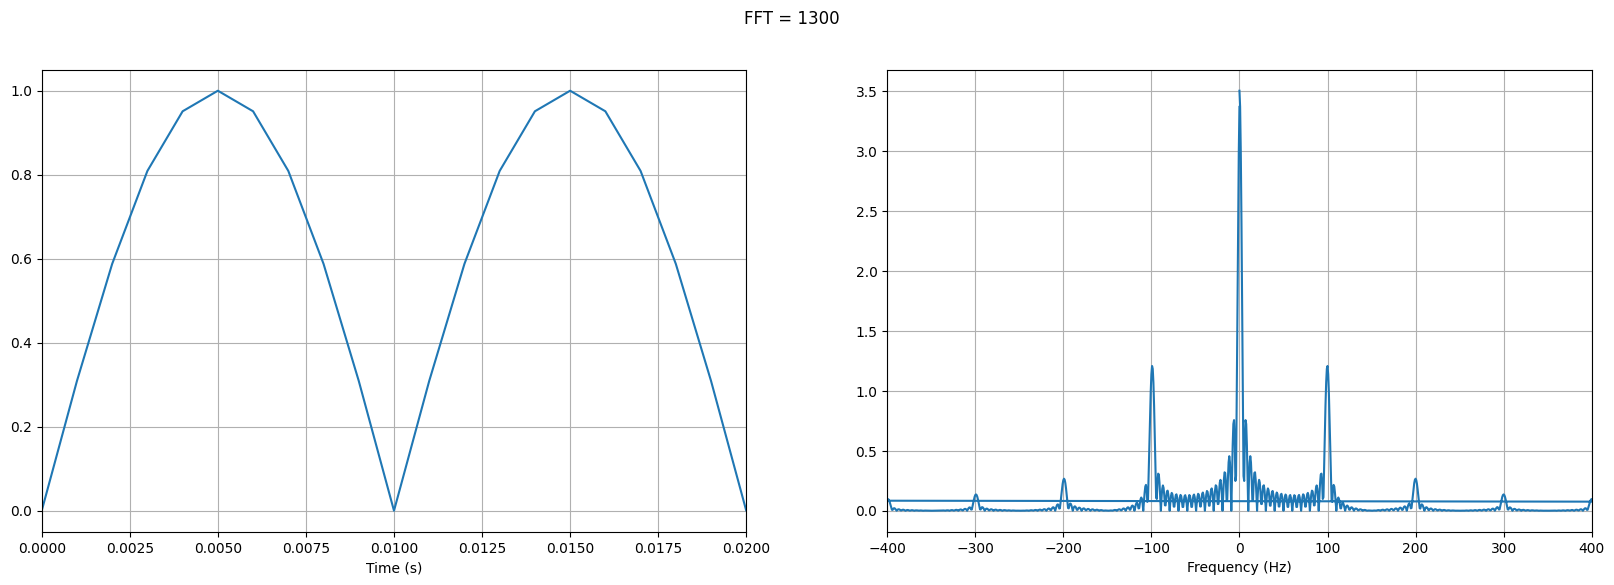

In [36]:
def tfsignal(xt, nfft, t_a, fs_a):
    
    xt.shape=(len(xt),1)                    # Convierto en vector columna para poder multiplicar con la matriz
    U=dftmatrix(len(xt), nfft)              # calculo la matriz de transformacion
    Xf=U.H*xt[:]                            # calculo la fft
    freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs_a/nfft # vector de frecuencias para poder graficar la fft en Hz

    f, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 6))
    f.suptitle('FFT = ' + str(nfft))
    ax1.plot(t_a, xt)
    ax1.set_xlabel('Time (s)')
    ax1.set_xlim(0, 0.02)
    ax1.grid()

    ax2.plot(freq, np.abs(Xf))
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_xlim(-400, 400)
    ax2.grid()
    

    return Xf


NFFTS = [100, 350, 1300]
FFTS = []

for nfft in NFFTS:
    Xf = tfsignal(x, nfft, t, fs)
    FFTS.append(Xf)



A medida de que se aumenta los numeros de puntos de la transformada de Fourier (NFFT) la resolución de la representación en frecuencia aumenta, esto significa que se pueden distinguir frecuencias cernanas entre si con mayor precisión, esto también significa que se puede obtener una representación mas continua en el espectro, permitiendo identificar frecuencias exactas, especialmente en componentes sinusoidales. Se podría decir que al aumentar los NFFT el detalle en el espectro de señal se hace tan visible que ahora es posible identificar el aporte de energía de cada armonico, lo cual se ve reflejado también en la ditribución de los valores de amplitud a medida de que se le agrega detalle. 

3. Use la siguiente instrucción para calcular la transformada inversa en cada uno de los casos del ítem anterior.  
    ```python
    inversa = np.fft.ifft(Xf.T)  # Xf: Frequency-domain signal
    ```

4. Grafique los resultados usando subplots y compárelos.  
    ¿Puede observar alguna diferencia?  
    ¿A qué se debe esto?  
    Escriba sus conclusiones.

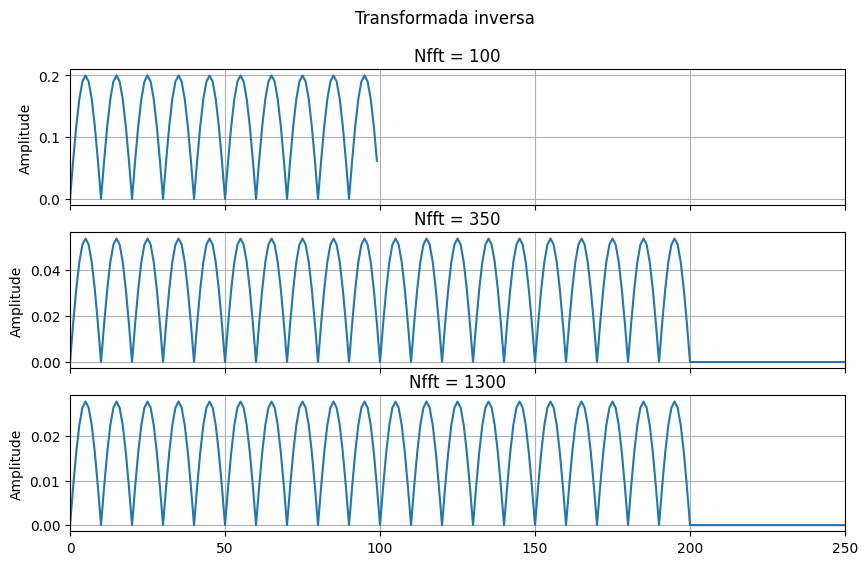

In [42]:
inv0 = np.real(np.fft.ifft(FFTS[0].T)).flatten()
inv1 = np.real(np.fft.ifft(FFTS[1].T)).flatten()
inv2 = np.real(np.fft.ifft(FFTS[2].T)).flatten()

f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
f.suptitle('Transformada inversa')
ax1.plot(inv0)
ax1.set_ylabel('Amplitude')
ax1.set_title('Nfft = ' + str(NFFTS[0]))

ax2.plot(inv1)
ax2.set_title('Nfft = ' + str(NFFTS[1]))
ax2.set_ylabel('Amplitude')

ax3.plot(inv2)
ax3.set_title('Nfft = ' + str(NFFTS[2]))
ax3.set_ylabel('Amplitude')

ax1.set_xlim(0, 250)

ax1.grid()
ax2.grid()
ax3.grid()



Aunque las señales reconstruidas no presentan diferencias visuales significativas respecto a la señal original, es importante señalar que al reducir el valor de NFFT, la Transformada de Fourier se realiza con un menor número de puntos. Esto implica que se está analizando una porción más pequeña de la señal original, lo que explica por qué, al disminuir el número de puntos, se obtienen menos ciclos al reconstruir la señal en el dominio del tiempo.

Por otro lado, también se observa una variación en la amplitud. Esto se debe a que la transformada inversa se efectúa únicamente con la información disponible en la transformada directa. Por ejemplo, con una NFFT de solo 100 puntos, la energía de la señal no se encuentra distribuida adecuadamente en el dominio de la frecuencia. A medida que se incrementa NFFT, esta distribución mejora, lo que permite una reconstrucción más precisa de la amplitud original de la señal.

## 2. MODULACIÓN PSK


1. Codifique los dos últimos dı́gitos de su cédula en binario (4 bits por dı́gito), y arme una trama de bits para ser transmitida. Usando $ E_b = 1 $, $ T_b = 0.002 $, $ f_c = 1000  \text{Hz} $, $ f_s = 7000 \, \text{Hz} $, genere las señales $ s_0 $ y $ s_1 $ para la transmisión de la trama de bits.  

2. Calcule y grafique la FFT de amplitud y fase de las señales $ s_0 $ y $ s_1 $ (escoja una $ NFFT $ donde visualice correctamente la FFT).  ¿Cuál es la diferencia entre ambas?  

3. Concatene las señales $ s_0 $ y $ s_1 $ de acuerdo con la trama a enviar, por ejemplo: si la trama a enviar es `0010`, la señal a enviar es $[s_0, s_0, s_1, s_0]$.  

4. Grafique la señal obtenida en el tiempo. ¿Se puede distinguir cada uno de los bits?  

5. Calcule y grafique la FFT de magnitud y fase de la señal concatenada. ¿Qué se puede apreciar?

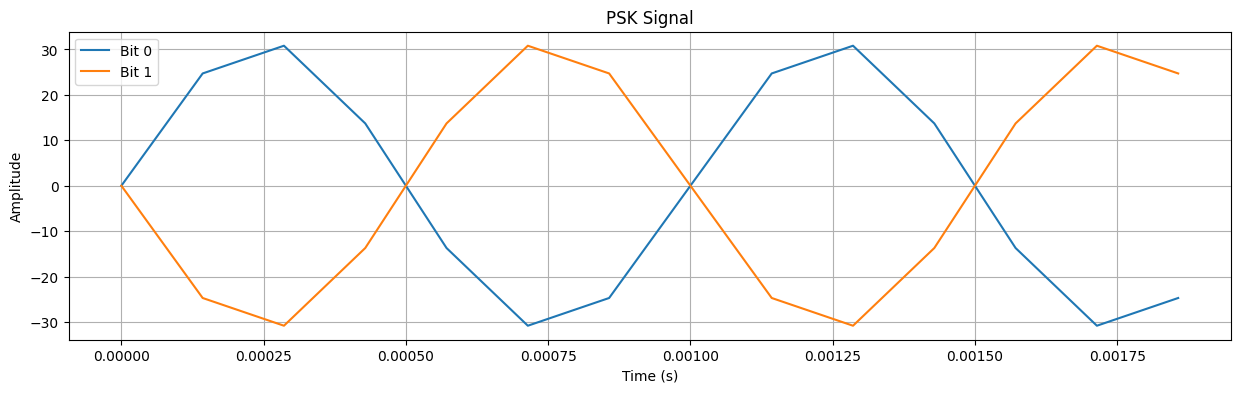

In [76]:
# ultimos digitos = 30
C_2 = 0
C_1 = 3

binary = format(C_1, '04b') + format(C_2, '04b')
bit_seq = [int(b) for b in binary]

# Parametros
Eb = 1          # energia
Tb = 0.002      # duracion
fc = 1000       # frecuencia portadora
fs_psk = 7000   # frecuencia de muestreo PSK

t_psk = np.arange(0, Tb, 1/fs_psk)  # vector de tiempo para un bit

s0 = np.sqrt(2*Eb/Tb) * np.sin(2*np.pi*fc*t_psk)  # señal portadora para bit 0
s1 = np.sqrt(2*Eb/Tb) * np.sin(2*np.pi*fc*t_psk + np.pi)  # señal portadora para bit 1


plt.figure(figsize=(15, 4))
plt.plot(t_psk, s0, label='Bit 0')
plt.plot(t_psk, s1, label='Bit 1')
plt.title('PSK Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [77]:
## Calculo de la FFT

NFFT_psk = 2000

U_s0 = dftmatrix(len(s0), NFFT_psk)
Xf_s0_psk = U_s0.conj().T @ s0
Xf_s0_psk = Xf_s0_psk.reshape((NFFT_psk, 1))

U_s1 = dftmatrix(len(s1), NFFT_psk)
Xf_s1_psk = U_s1.conj().T @ s1
Xf_s1_psk = Xf_s1_psk.reshape((NFFT_psk, 1))

freq_psk = np.fft.fftfreq(NFFT_psk, 1/fs_psk)  # vector de frecuencias para poder graficar la fft en Hz



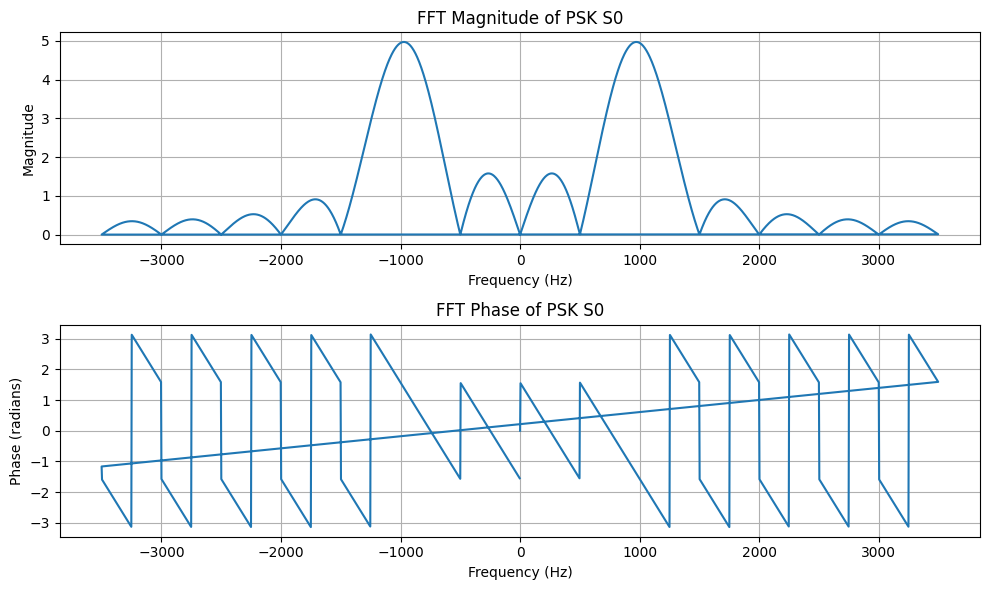

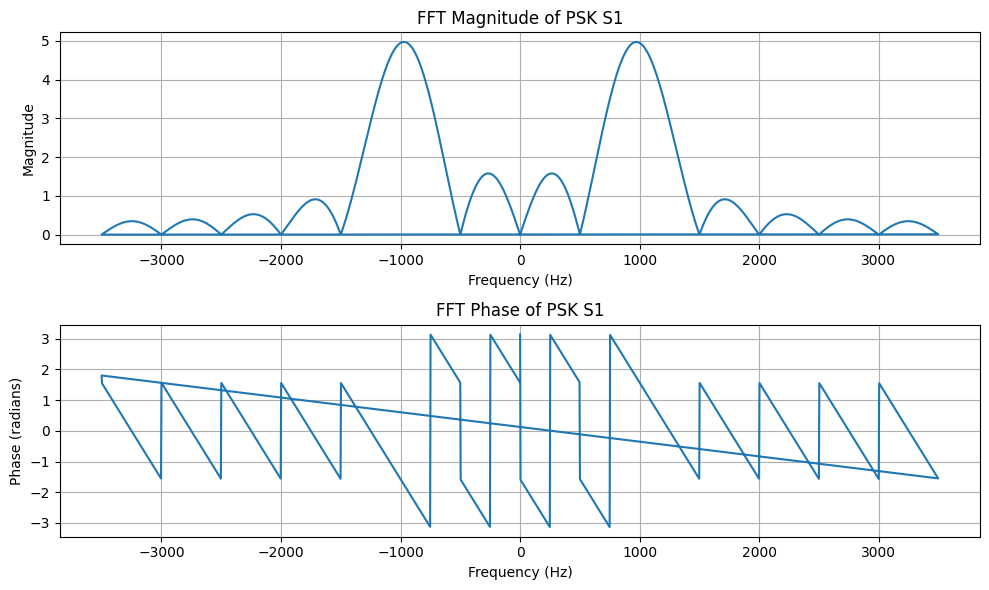

In [78]:
# Primer bit 

plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(freq_psk, np.abs(Xf_s0_psk))
plt.title("FFT Magnitude of PSK S0")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(freq_psk, np.angle(Xf_s0_psk))
plt.title("FFT Phase of PSK S0")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()



# Segundo bit
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)

plt.plot(freq_psk, np.abs(Xf_s1_psk))
plt.title("FFT Magnitude of PSK S1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(freq_psk, np.angle(Xf_s1_psk))
plt.title("FFT Phase of PSK S1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()



Dado que en esencia es la misma señal, pero desfasada $180°$, la amplitud en frecuencia es la misma, esto es coherente con el hecho de que el contenido espectral no cambia por un desfase temporal y que el pico de magnitud se mantiene en $ f_c = 1000\text{Hz} $ como se esperaba. Sin embargo debido al desfase, el ángulo de fase de ambas señales es opuesto, las fases difieren en exactamente $\pi$

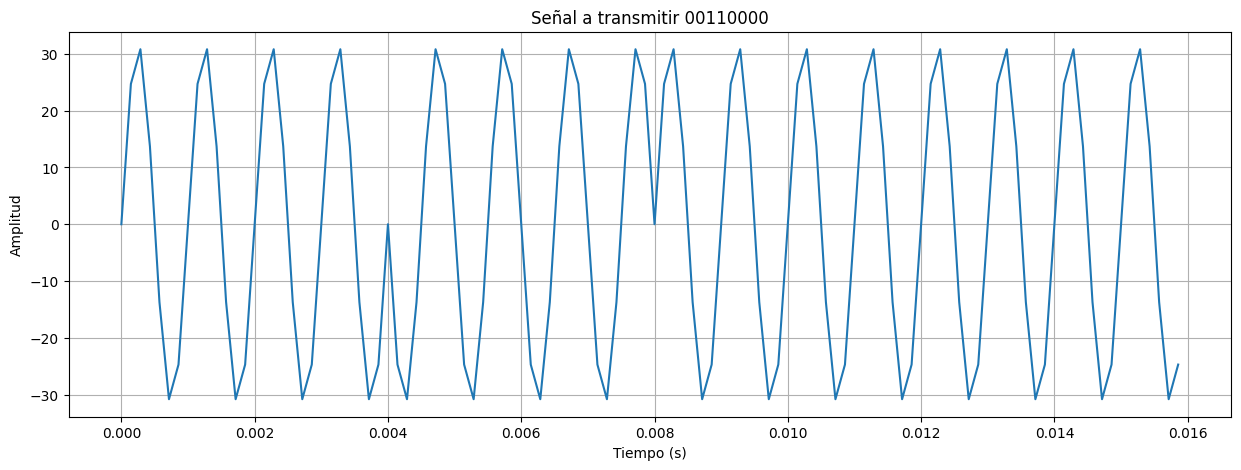

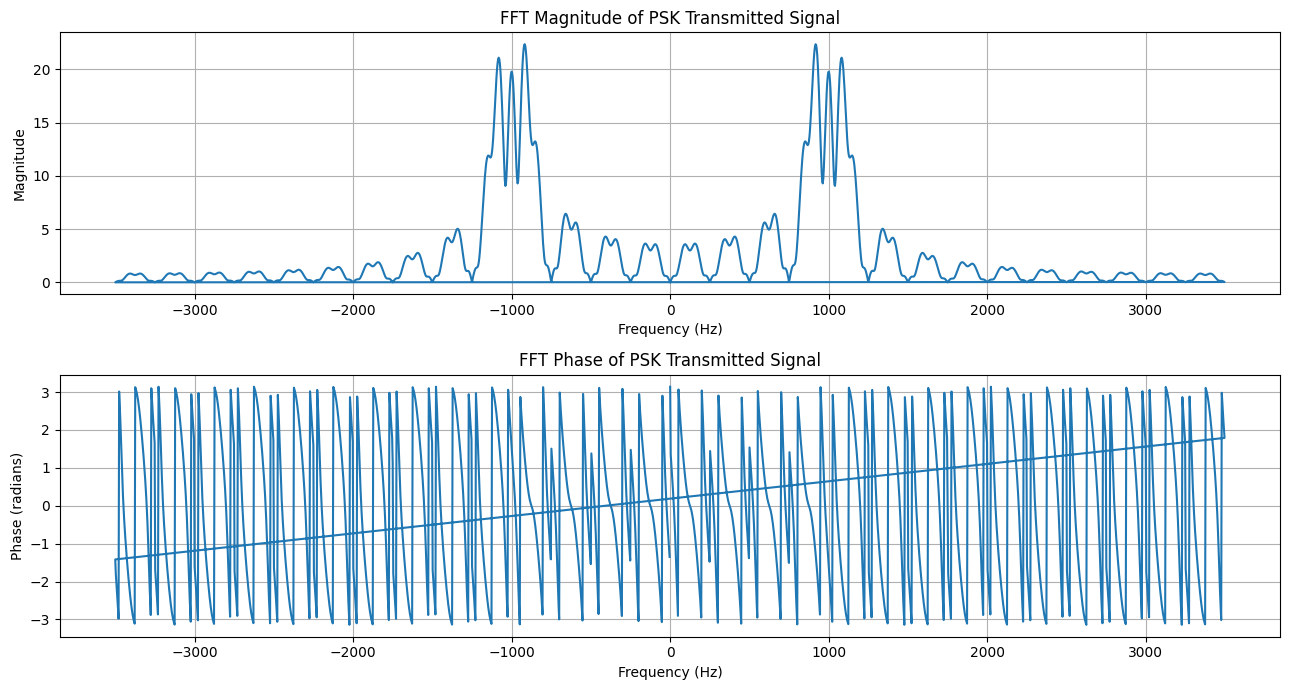

In [90]:
# Concatenate signals based on bit sequence
transmitted_signal = np.concatenate([s0 if bit == 0 else s1 for bit in bit_seq])

# Plot the concatenated PSK signal
plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, Tb * len(bit_seq), 1/fs_psk), transmitted_signal)
plt.title(f"Señal a transmitir {binary}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# TRansformada de Fourier de la señal transmitida
NFFT_psk = 2000
U_psk = dftmatrix(len(transmitted_signal), NFFT_psk)
Xf_psk = U_psk.conj().T @ transmitted_signal
Xf_psk = Xf_psk.reshape(NFFT_psk, 1)

# Vector de frecuencias para la FFT
freq_psk = np.fft.fftfreq(NFFT_psk, d=1/fs_psk)

# graficas 
plt.figure(figsize=(13, 7))
plt.subplot(2,1,1)
plt.plot(freq_psk, np.abs(Xf_psk))
plt.title("FFT Magnitude of PSK Transmitted Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(freq_psk, np.angle(Xf_psk))
plt.title("FFT Phase of PSK Transmitted Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()

Cada bit de la secuencia puede identificarse en la señal transmitida debido a los cambios abruptos de fase, los cuales indican las transiciones de 0 a 1 y de 1 a 0. Estos cambios son aun más apreciables debido a la asciación a la duración de bit que permite delimitar claramente la presencia de nuevos simbolos en el tiempo. 

En cuanto a la magnitud del espectro, se observa que al rededor de la frecuencia de la señal portadora, esto se debe a los cambios de fase en la señal, los cuales introducen componentes espectrales adicionales como resultado de la interferencia contructiva y destructiva entre las distintas fases. Estos efectos desplazan la energía espectral hacia las bandas laterales, lo que es caracteristico de señales moduladas en fase como la PSK. 



## CONCLUSIONES. 

* La precision de la transformada de Fourier está directamente relacionada con un muestreo adecuado. Si la señal no está muestreada correctamente, puede producirse el aliasing, lo que distorsiona las componentes de alta frecuencia y afecta la representación espectral como la calidad de la reconstrucción mediante la transformada inversa de Fourier.

* En la transformada rápida de Fourier (FFT) existe un compromiso entre resolución temporal y resolución espectral. Al aumentar los puntos de la FFT mejorala resolución en frecuencia, pero puede reducir la capacidad de análisis temporal. Por lo tanto, es fundamental elegir un tamaño de FFT que equilibre adecuadamente ambos espectos según los objetivos del analisis. 

*  El análisis espectral de señales PSK mediante FFT permite identificar cómo se distribuye la energía de la señal modulada en el domunio de la frecuencia. Esta información es esencial en aplicaciones de telecomunicaciones, ya que facilita el diseño y la evaluación de esquemas de modulación más eficiente y robustos. 

* Para la reconstrucción precisa de la señal a partir de la IFFT es crucial preservar con fidelidad los datos en el dominio de la frecuencia. La pérdida de componentes relevantes o la presencia del aliasing puede introducir distorsiones en la señal recuperada, como se evidenció en la aparición de picos no deseados en lugar de una onda sinusoidal limpia. 
